# Visualización de Embeddings e Investigación de Analogías

Es notebook carga modelos preentrenados de Word2Vec para varios libros de Austen, Tolstoy y Joyce. Enfocándose en los personajes principales de cada libro, recupera las palabras más semánticamente similares a ellos, reduce la dimensionalidad de los vectores resultantes y los grafica en dos dimensiones para su visualización. Además, explora relaciones temáticas para conceptos clave como "amor", "guerra", "paz", "muerte" y "honor" utilizando razonamiento analógico, para obtener una comprensión más profunda de los temas en estos libros.

## 0. Importación de Librerías

In [1]:
import re

import gensim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 1. Definición de Funciones

In [2]:
def load_word2vec_model(model_path):
    """
    Carga un modelo Word2Vec entrenado desde un archivo.
    
    Args:
    model_path (str): Ruta al archivo del modelo entrenado.
    
    Returns:
    gensim.models.Word2Vec: El modelo Word2Vec cargado.
    """
    model = gensim.models.Word2Vec.load(model_path)
    return model

def reduce_dimensions(word_vectors, method='pca', n_components=2):
    """
    Reduce la dimensionalidad de los vectores de palabras a 2D para visualización.
    
    Args:
    word_vectors (numpy.ndarray): Vectores de palabras extraídos del modelo Word2Vec.
    method (str): Método de reducción de dimensionalidad ('pca' o 'tsne').
    n_components (int): Número de dimensiones deseadas (2 para visualización en 2D).
    
    Returns:
    numpy.ndarray: Vectores de palabras reducidos a 2D.
    """
    if method == 'pca':
        pca = PCA(n_components=n_components)
        reduced_vectors = pca.fit_transform(word_vectors)
    elif method == 'tsne':
        tsne = TSNE(n_components=n_components, random_state=42)
        reduced_vectors = tsne.fit_transform(word_vectors)
    else:
        raise ValueError("Método no soportado. Usa 'pca' o 'tsne'.")
    
    return reduced_vectors

def plot_embeddings(reduced_vectors, words, title='Visualización de Embeddings'):
    """
    Crea un gráfico 2D de los vectores de palabras reducidos.
    
    Args:
    reduced_vectors (numpy.ndarray): Vectores de palabras reducidos a 2D.
    words (list of str): Lista de palabras correspondientes a los vectores.
    title (str): Título del gráfico.
    """
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
    
    # Añadir las etiquetas (palabras) al gráfico
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
    
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)
    plt.show()

def find_analogies(model, positive_words, negative_words):
    """
    Encuentra analogías utilizando el modelo Word2Vec.
    
    Args:
    model (gensim.models.Word2Vec): Modelo entrenado de Word2Vec.
    positive_words (list): Lista de palabras positivas para las analogías.
    negative_words (list): Lista de palabras negativas para las analogías.
    
    Returns:
    list: Lista de palabras más similares a la analogía.
    """
    try:
        results = model.wv.most_similar(positive=positive_words, negative=negative_words)
        return results
    except KeyError as e:
        print(f"Una de las palabras no está en el vocabulario: {e}")
        return None

## 2. Visualización de Embeddings e Investigación de Analogías

Visualizando embeddings para Sense and Sensibility de Jane Austen...


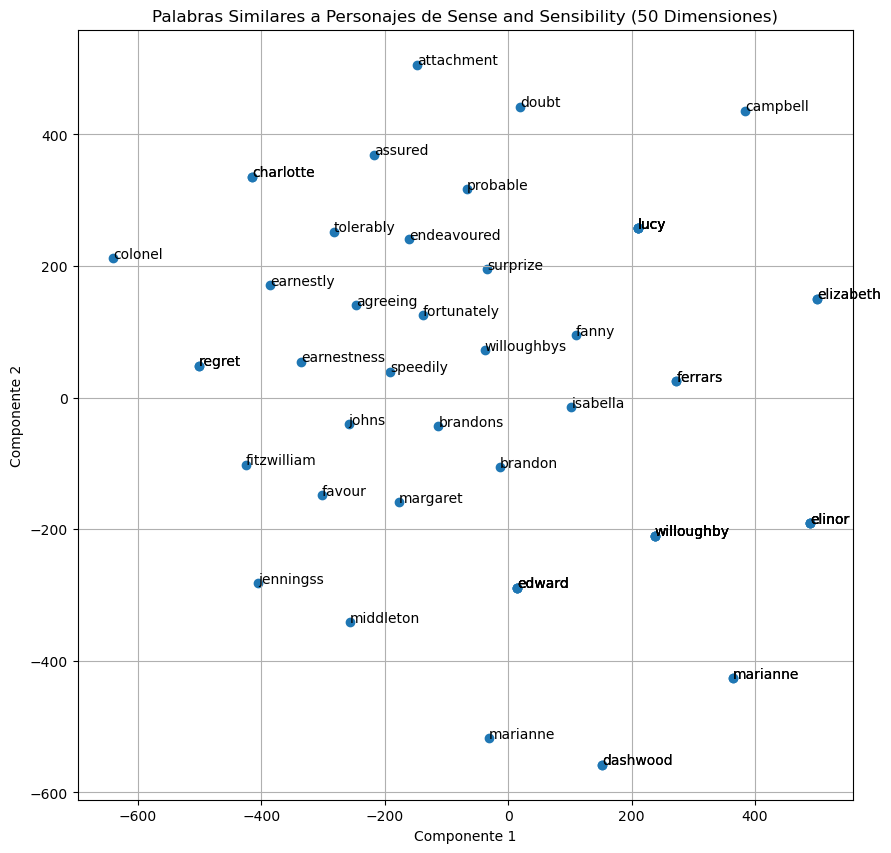

Buscando analogías temáticas para Sense and Sensibility de Jane Austen...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.608

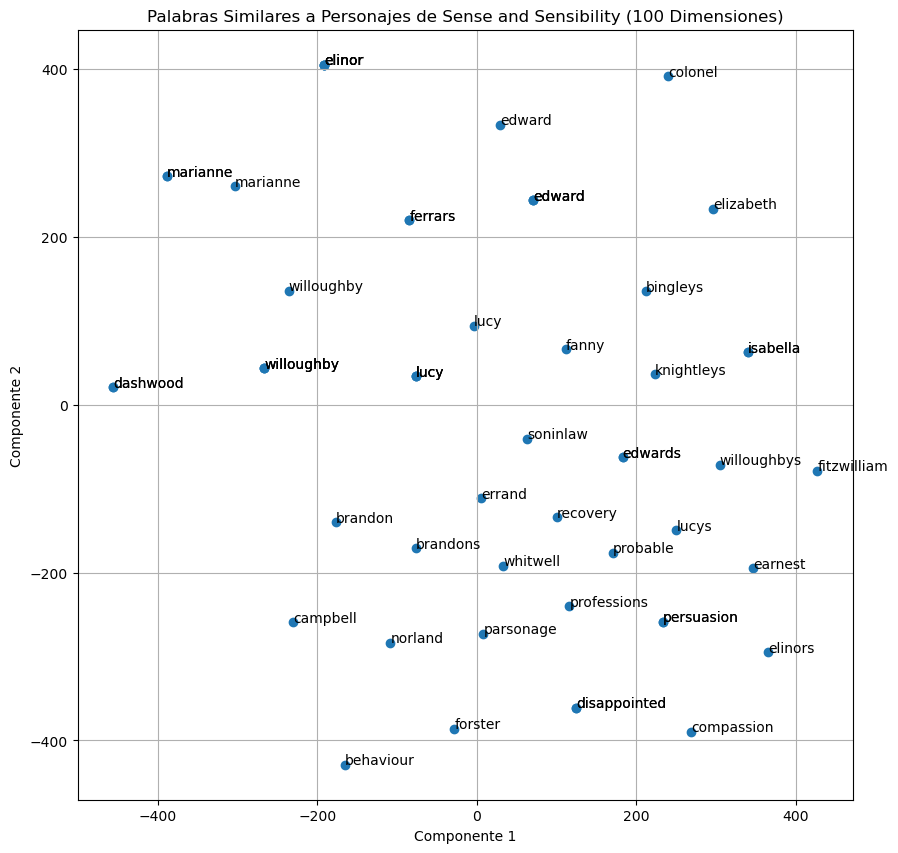

Buscando analogías temáticas para Sense and Sensibility de Jane Austen...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsaf

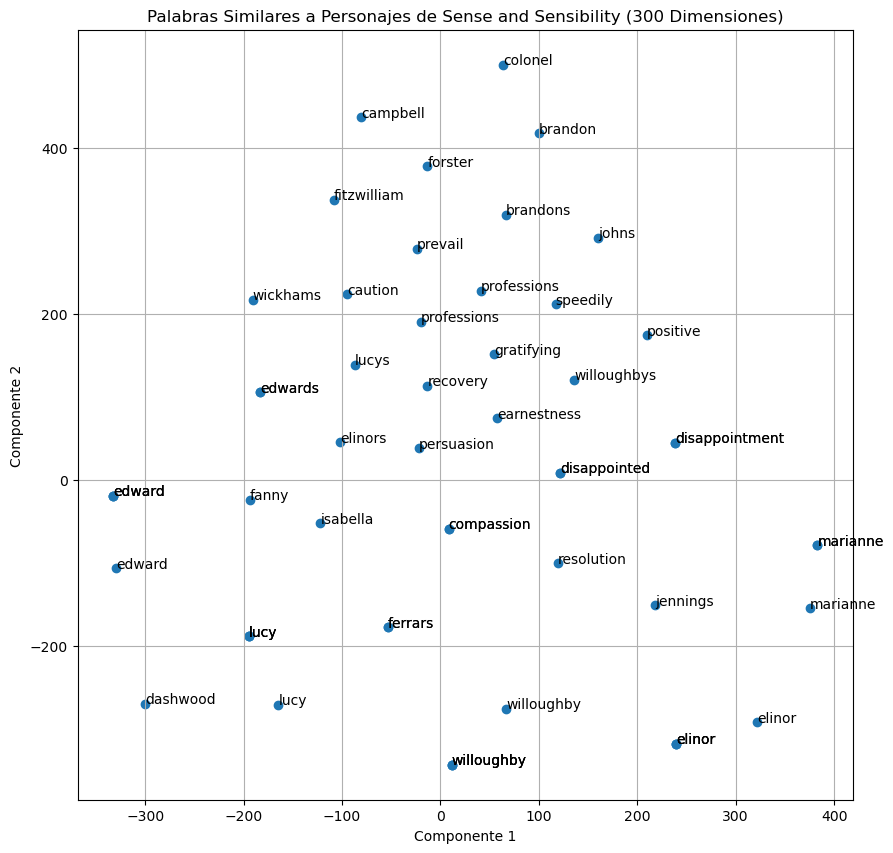

Buscando analogías temáticas para Sense and Sensibility de Jane Austen...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.484629

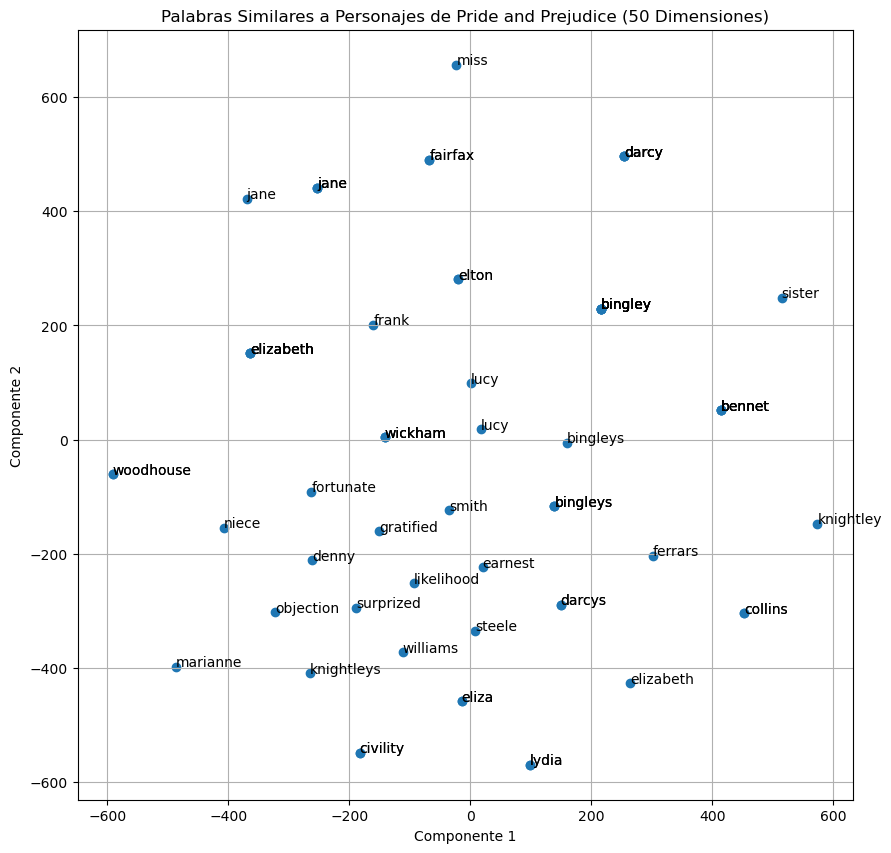

Buscando analogías temáticas para Pride and Prejudice de Jane Austen...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.60899

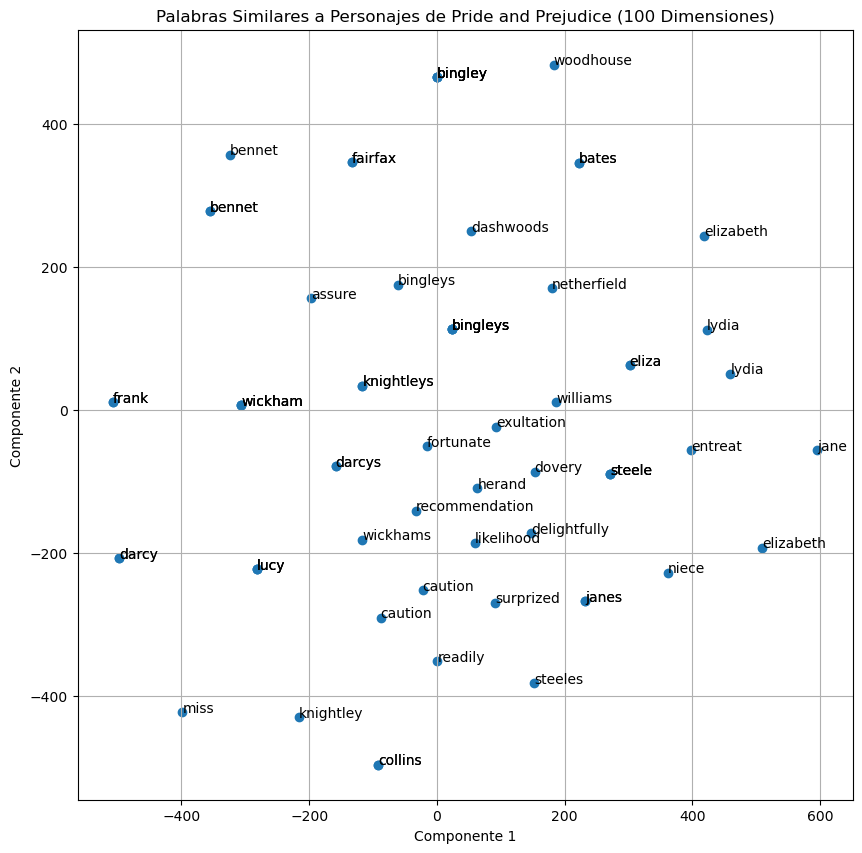

Buscando analogías temáticas para Pride and Prejudice de Jane Austen...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsafed

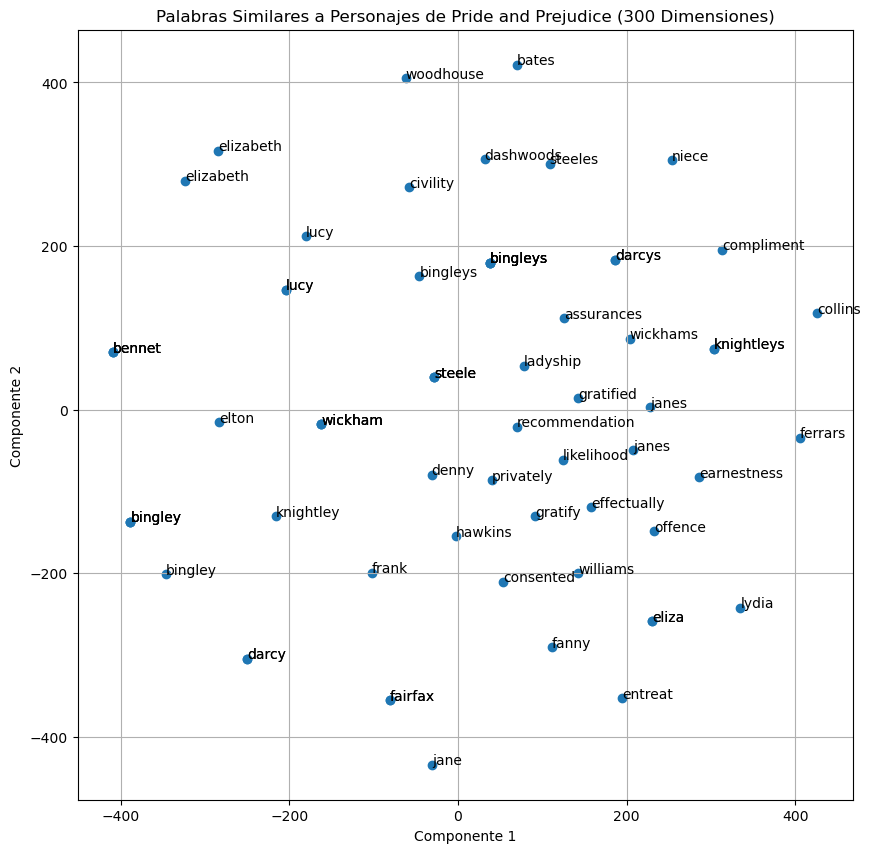

Buscando analogías temáticas para Pride and Prejudice de Jane Austen...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.48462957

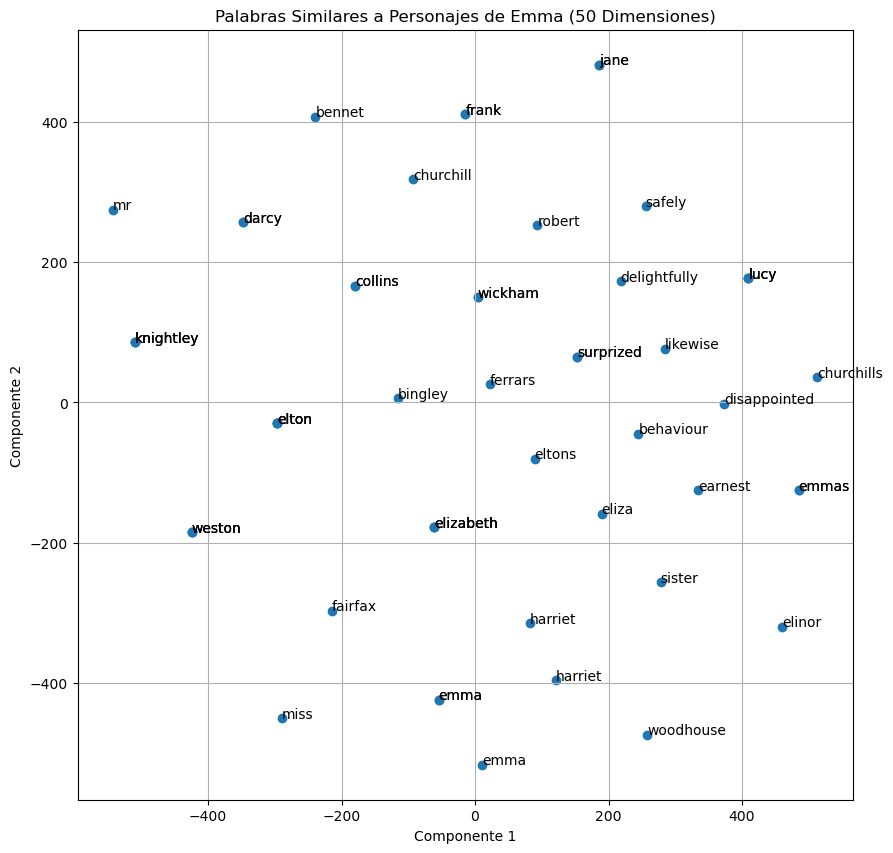

Buscando analogías temáticas para Emma de Jane Austen...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.6089982390403748), (

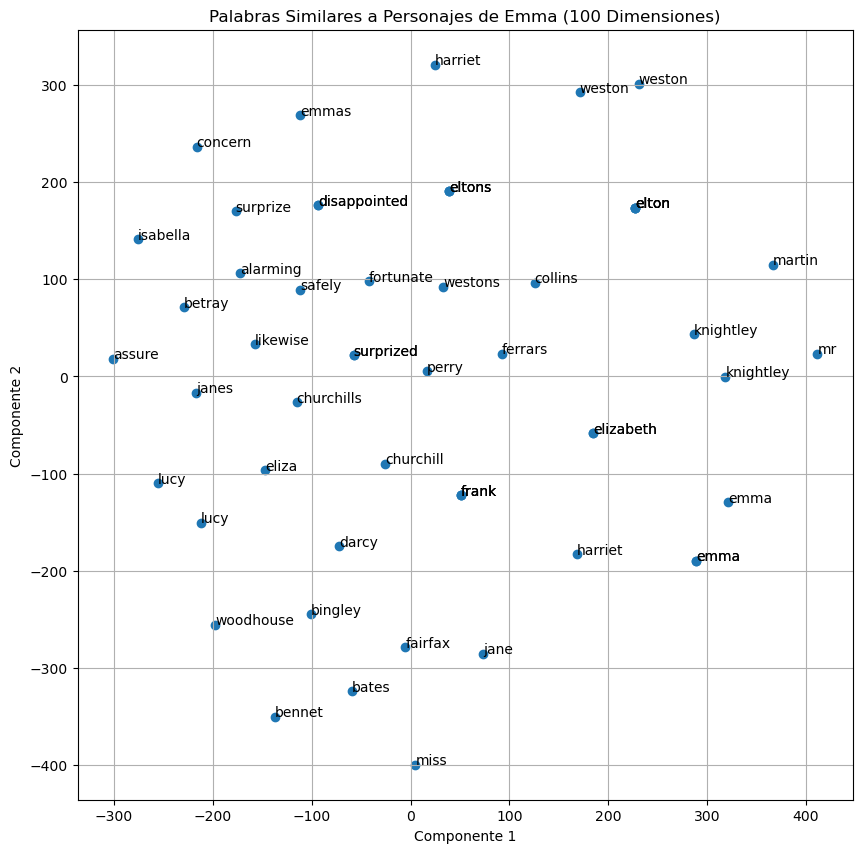

Buscando analogías temáticas para Emma de Jane Austen...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsafed', 0.4916689097

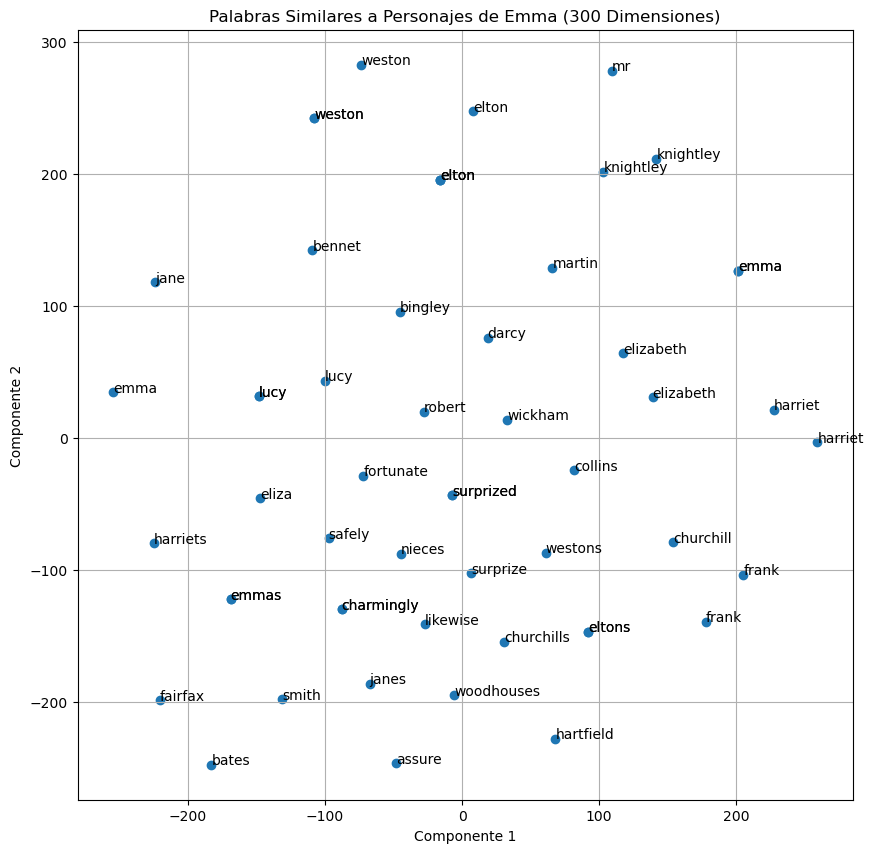

Buscando analogías temáticas para Emma de Jane Austen...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.4846295714378357), ('im

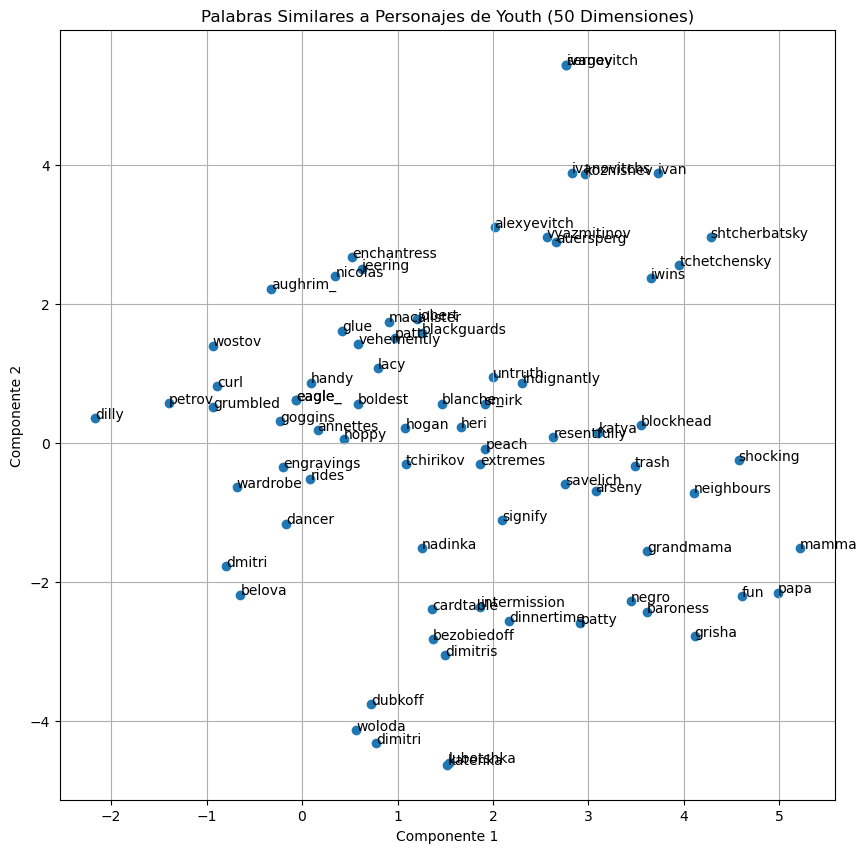

Buscando analogías temáticas para Youth de Leo Tolstoy...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.6089982390403748), 

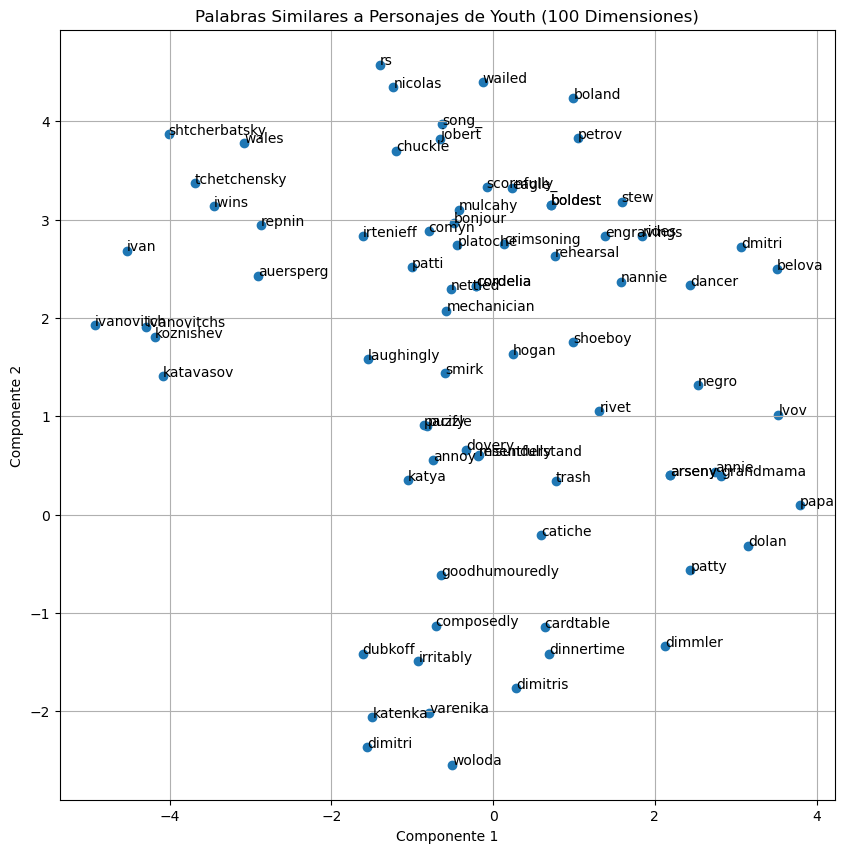

Buscando analogías temáticas para Youth de Leo Tolstoy...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsafed', 0.491668909

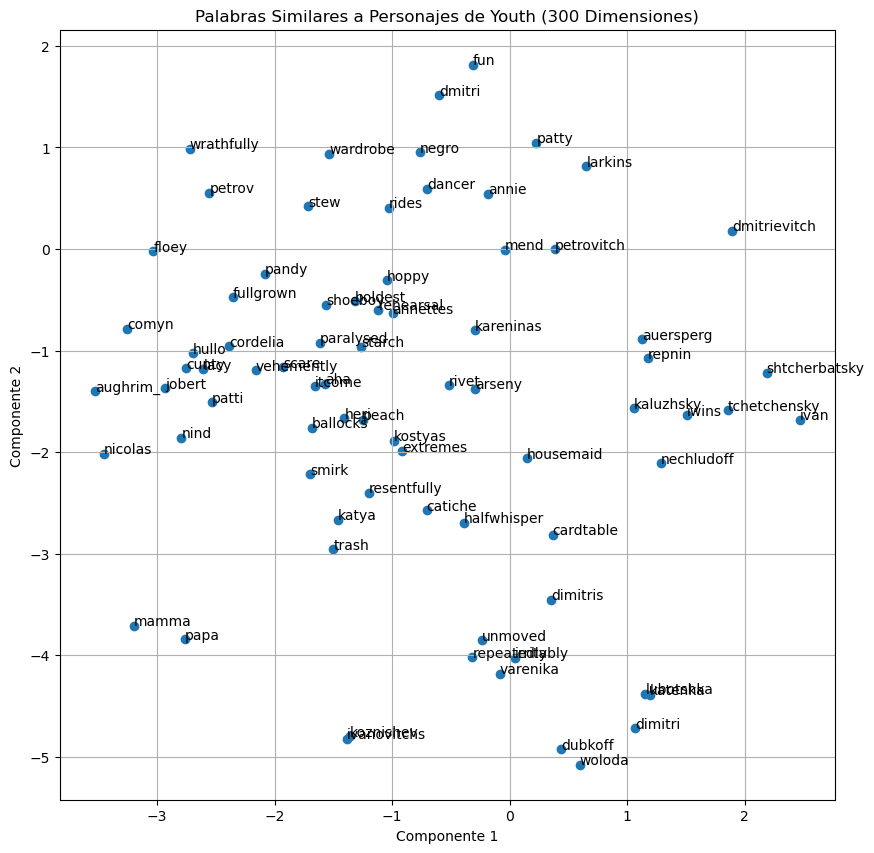

Buscando analogías temáticas para Youth de Leo Tolstoy...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.4846295714378357), ('i

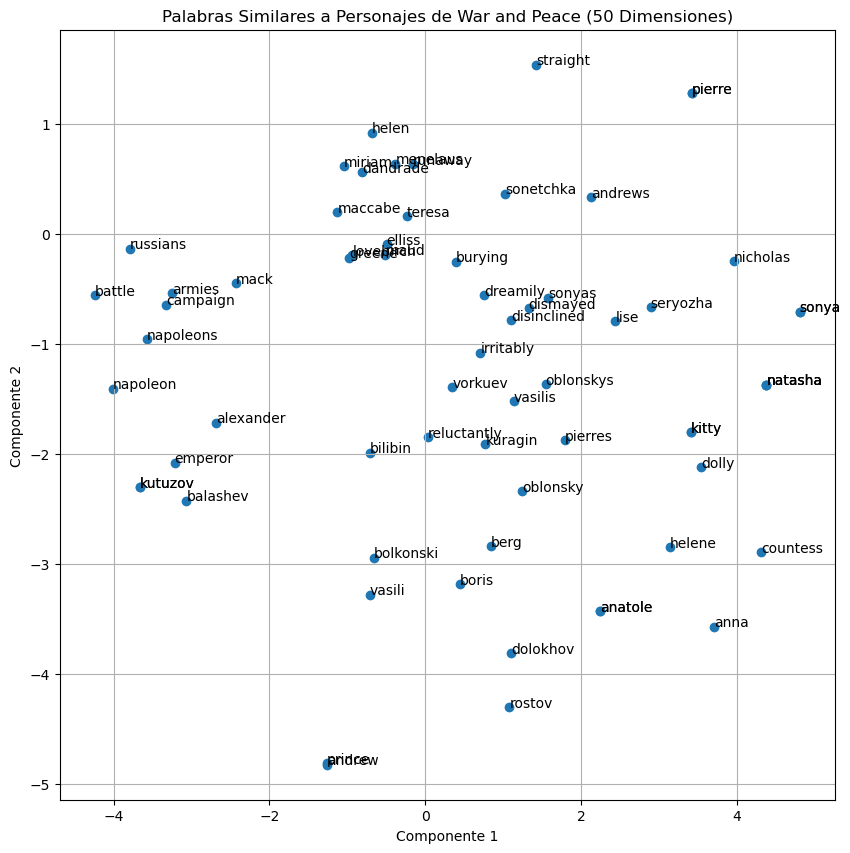

Buscando analogías temáticas para War and Peace de Leo Tolstoy...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.60899823904

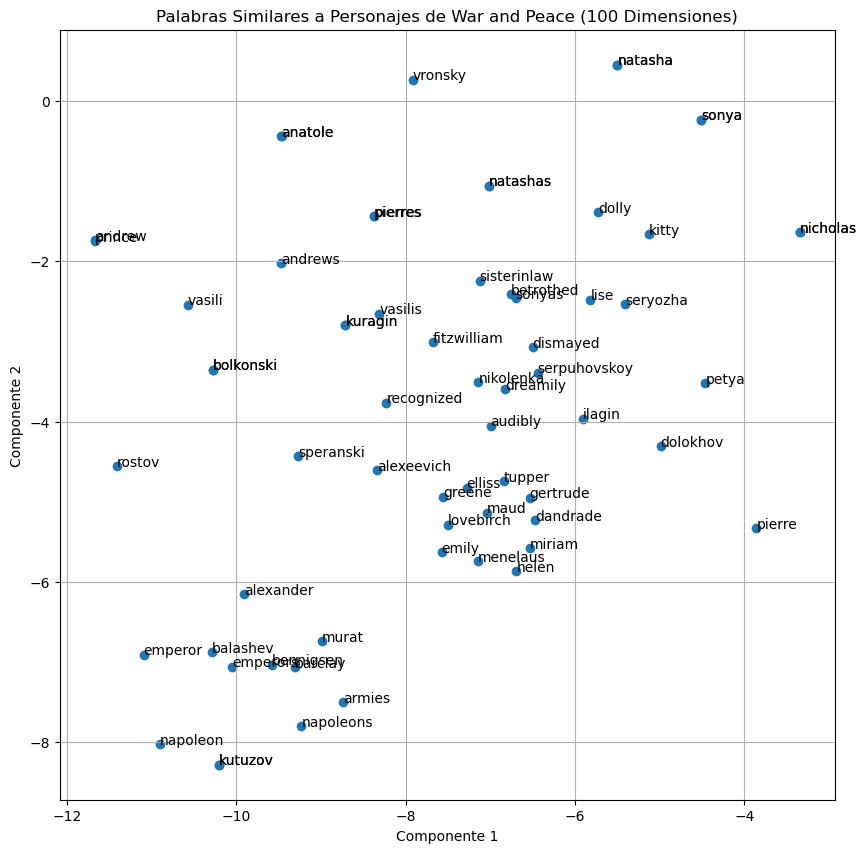

Buscando analogías temáticas para War and Peace de Leo Tolstoy...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsafed', 0.4

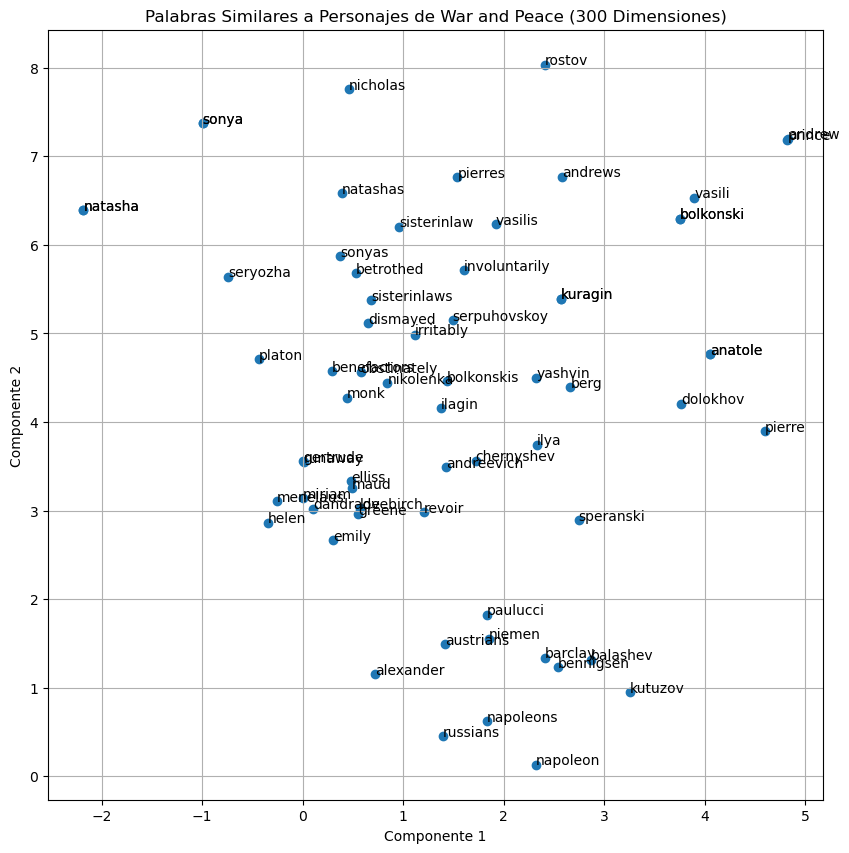

Buscando analogías temáticas para War and Peace de Leo Tolstoy...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.48462957143783

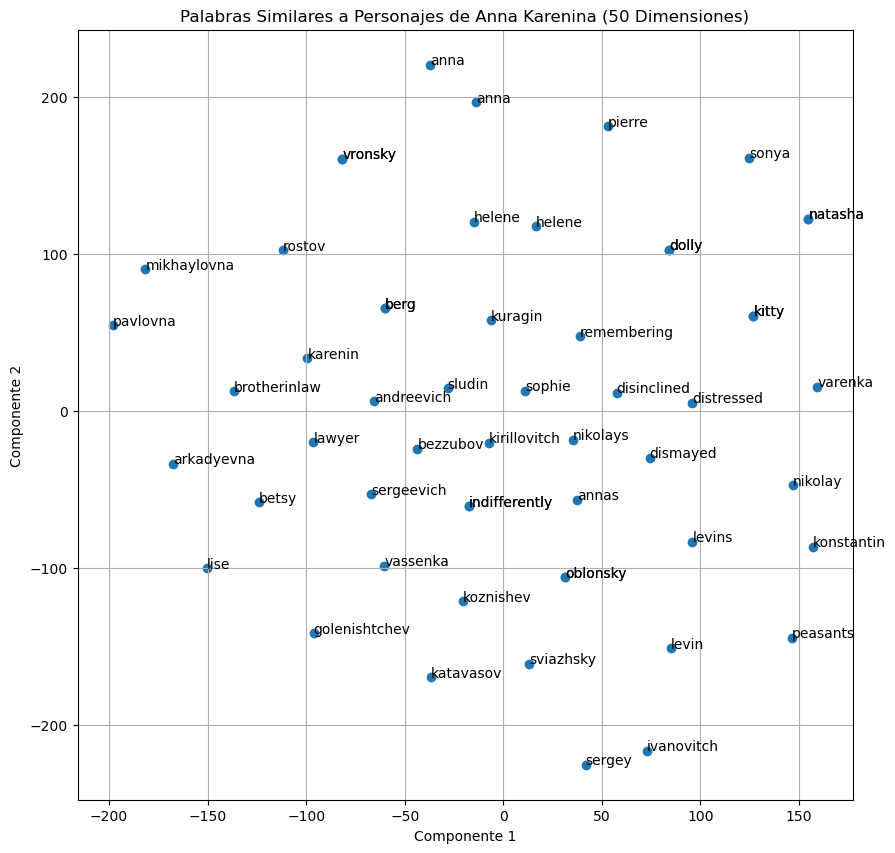

Buscando analogías temáticas para Anna Karenina de Leo Tolstoy...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.60899823904

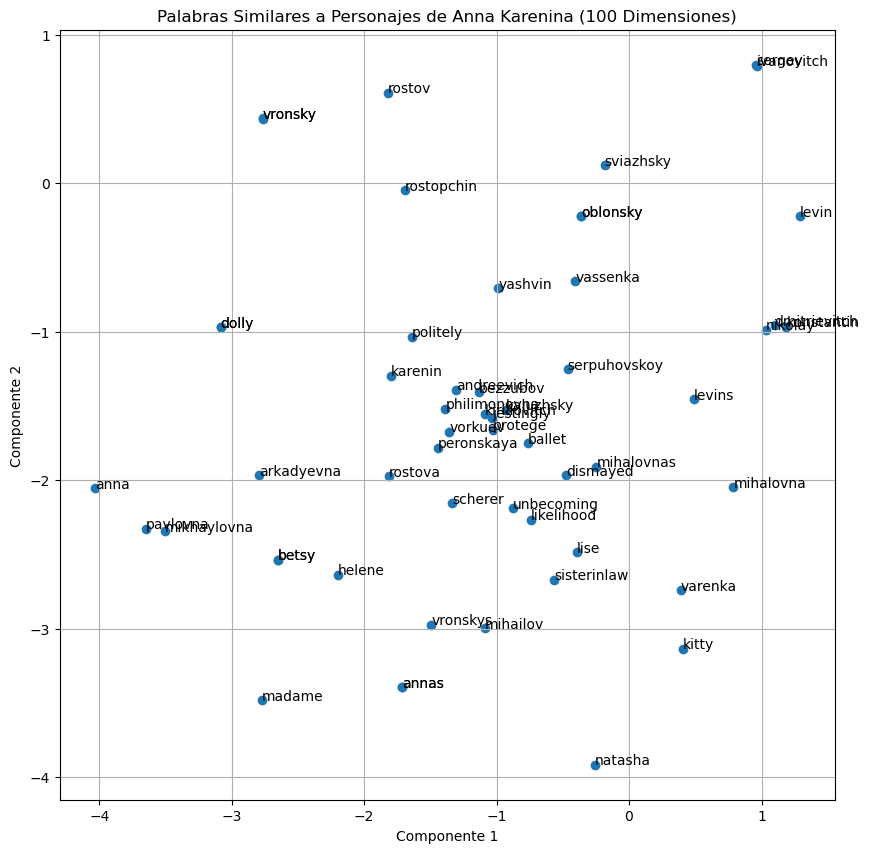

Buscando analogías temáticas para Anna Karenina de Leo Tolstoy...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsafed', 0.4

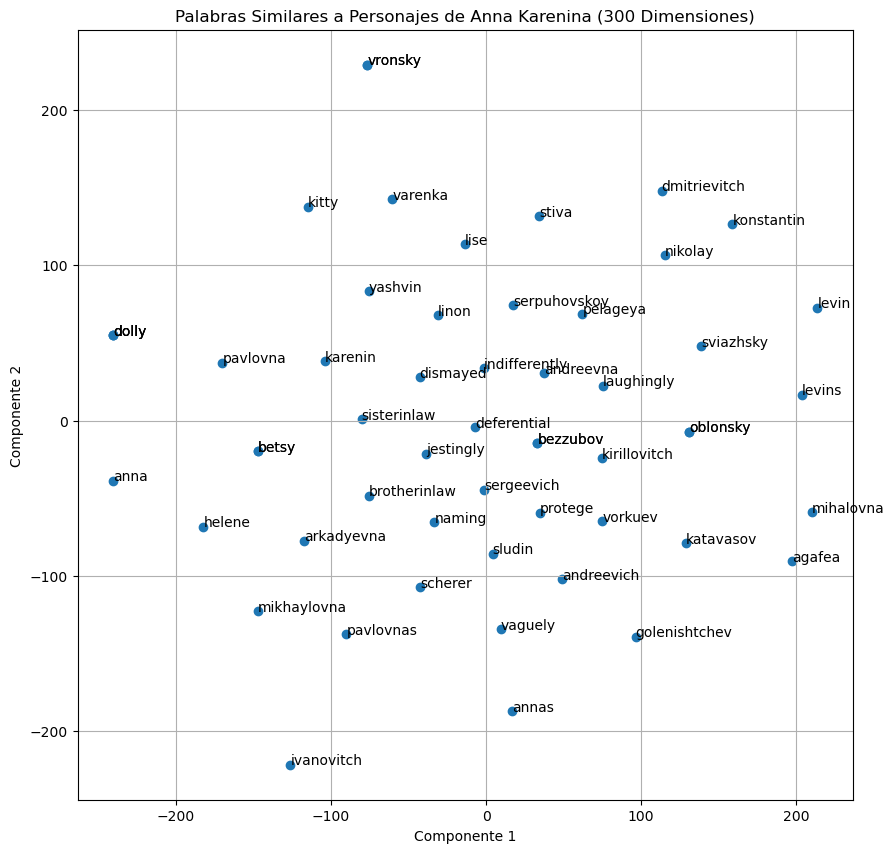

Buscando analogías temáticas para Anna Karenina de Leo Tolstoy...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.48462957143783

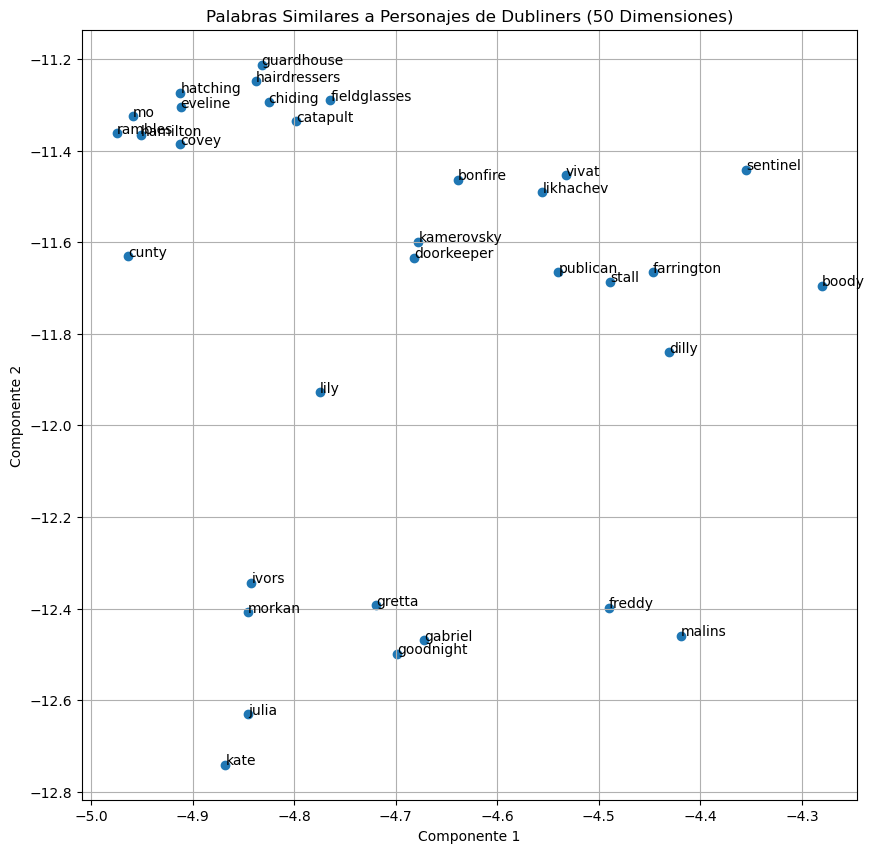

Buscando analogías temáticas para Dubliners de James Joyce...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.608998239040374

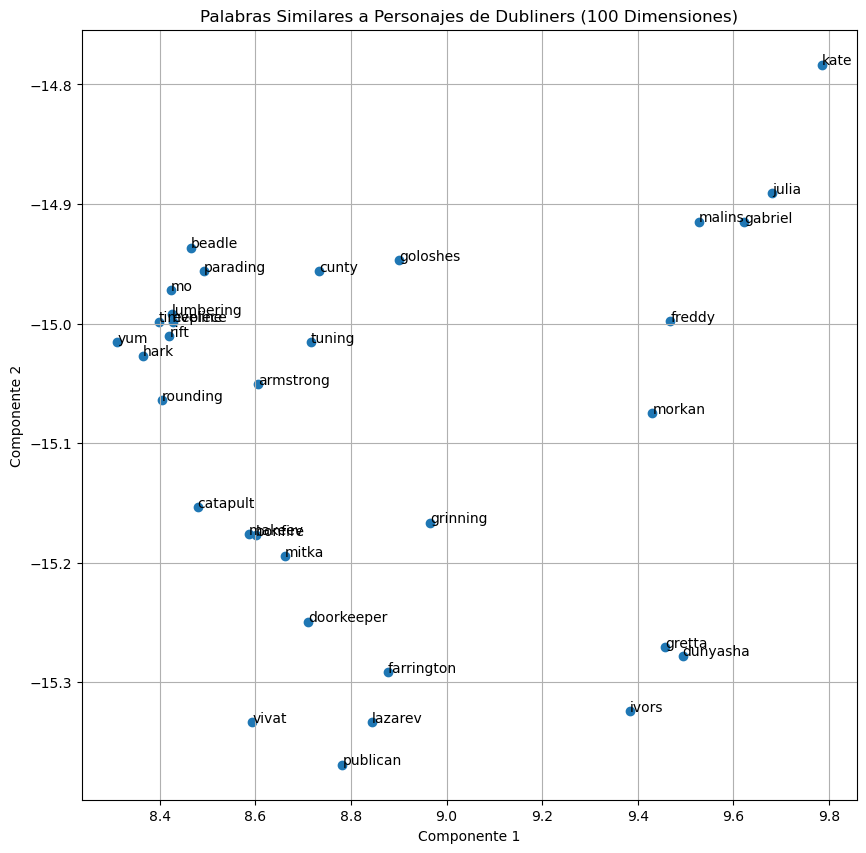

Buscando analogías temáticas para Dubliners de James Joyce...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsafed', 0.49166

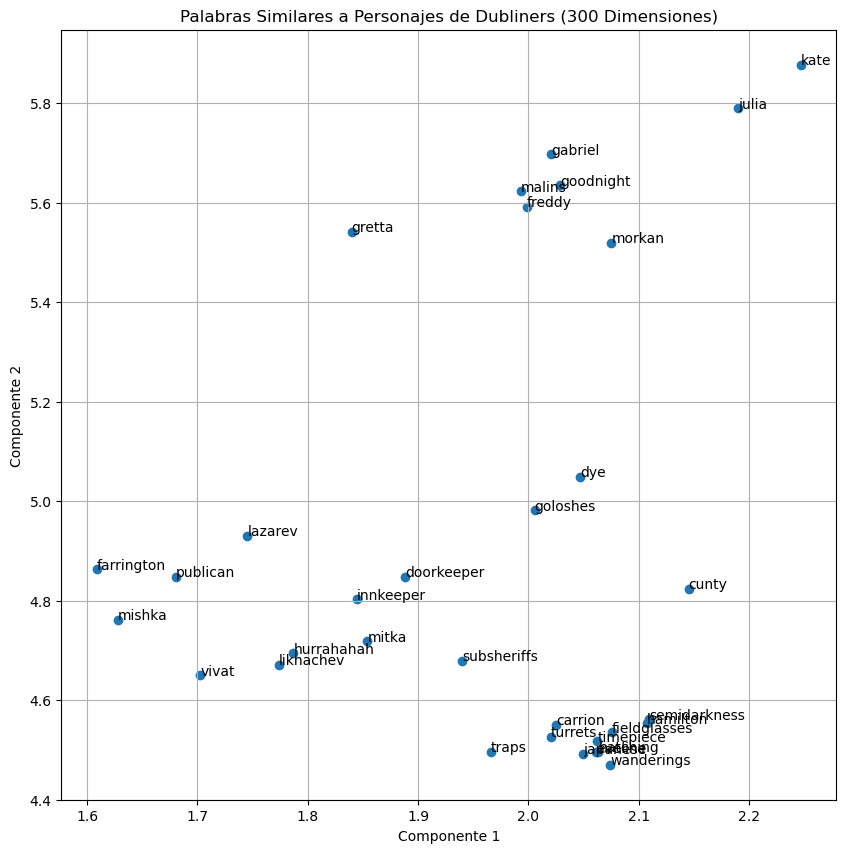

Buscando analogías temáticas para Dubliners de James Joyce...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.4846295714378357),

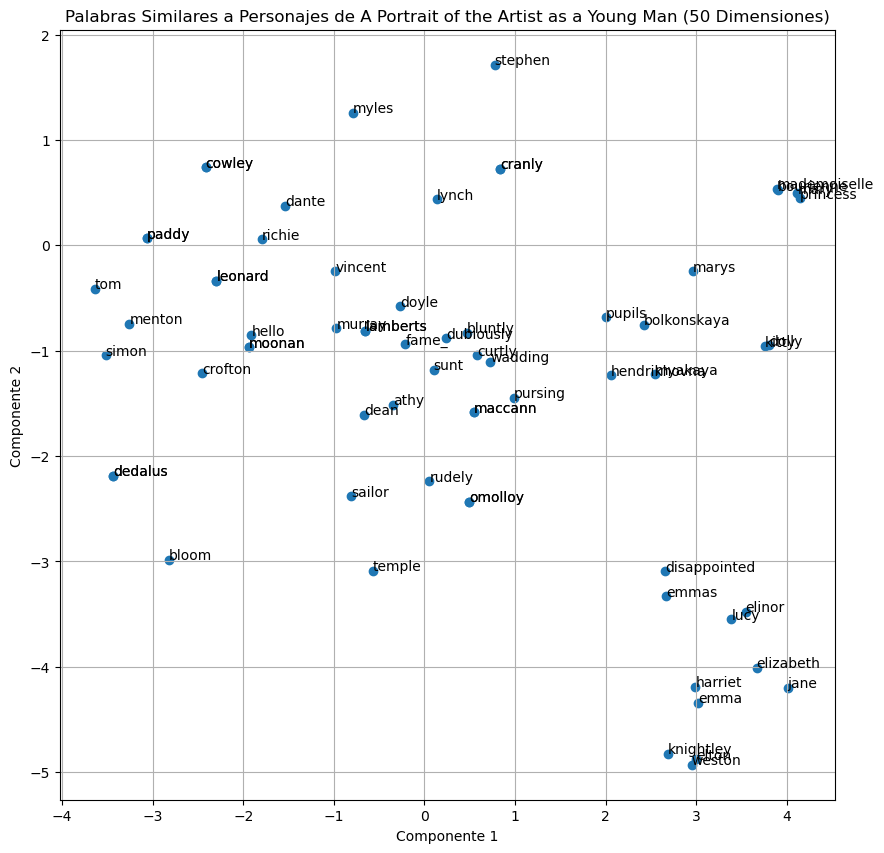

Buscando analogías temáticas para A Portrait of the Artist as a Young Man de James Joyce...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863),

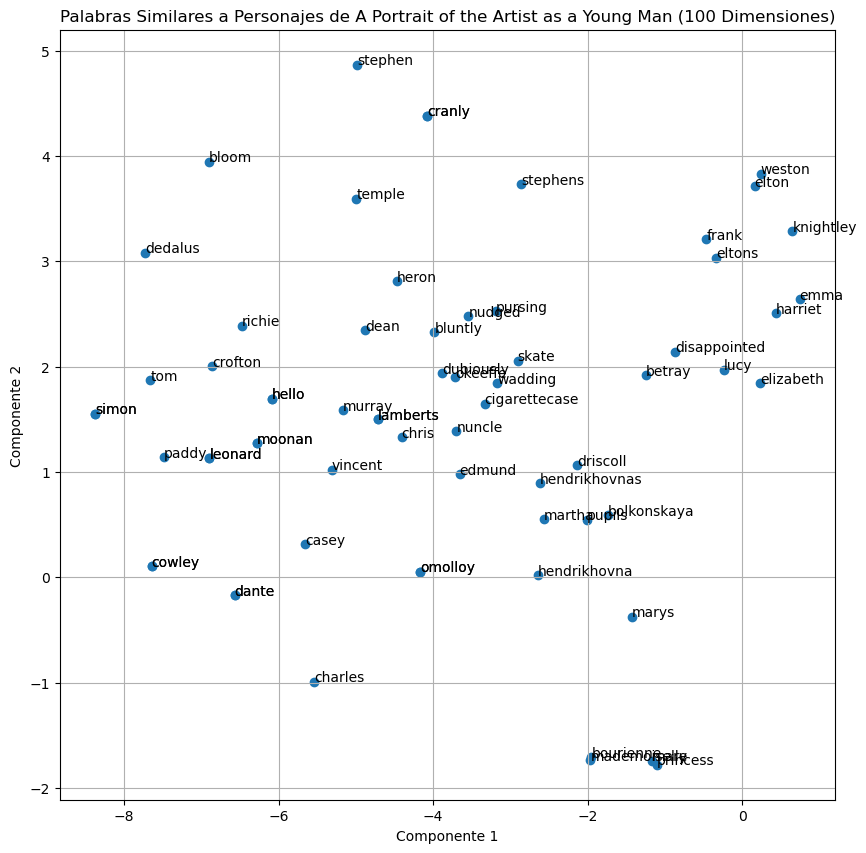

Buscando analogías temáticas para A Portrait of the Artist as a Young Man de James Joyce...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.49436366558

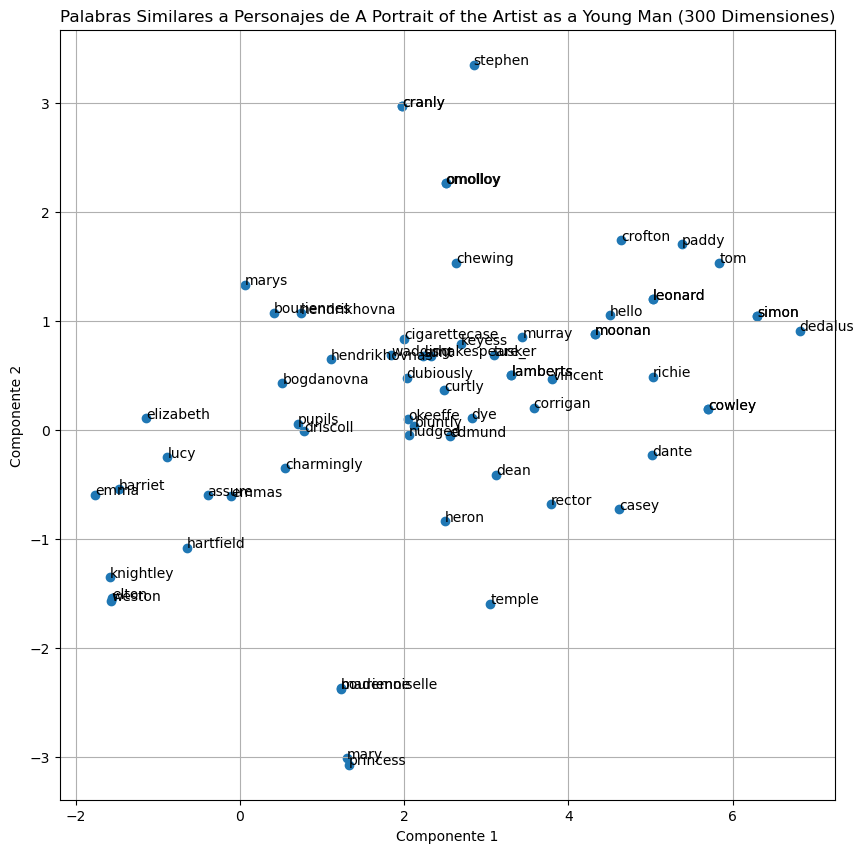

Buscando analogías temáticas para A Portrait of the Artist as a Young Man de James Joyce...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('bles

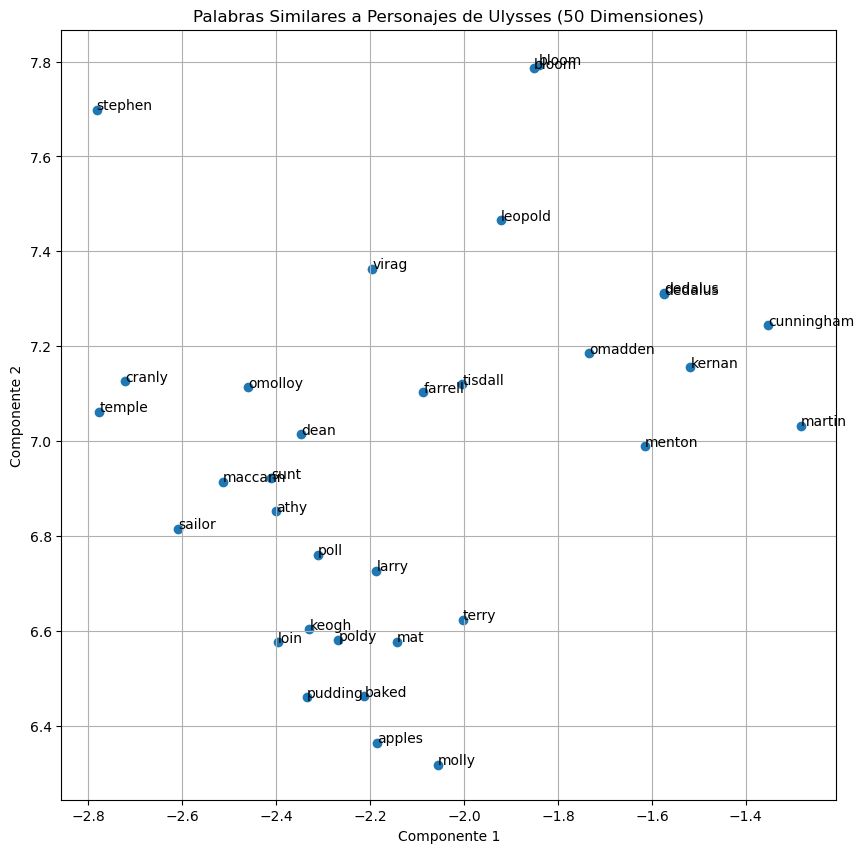

Buscando analogías temáticas para Ulysses de James Joyce...
Relación para love: [('lover', 0.6965073943138123), ('jealous', 0.6849298477172852), ('loving', 0.6777536869049072), ('happiness', 0.6636040806770325), ('charm', 0.6588281393051147), ('loved', 0.6567750573158264), ('marrying', 0.6440776586532593), ('torture', 0.6402263045310974), ('affianced', 0.639656662940979), ('charming', 0.639066219329834)]
Relación para war: [('wars', 0.6346979141235352), ('century', 0.6343181729316711), ('motives', 0.6324369311332703), ('intrigues', 0.6310295462608337), ('prize', 0.6224761009216309), ('thiers', 0.6215090155601501), ('episode', 0.6188602447509766), ('heroism', 0.6170561909675598), ('austria', 0.6140212416648865), ('economy', 0.6101680994033813)]
Relación para peace: [('console', 0.6229590177536011), ('happiness', 0.6220309734344482), ('sake', 0.6191104650497437), ('implore', 0.6188646554946899), ('vanity', 0.6122942566871643), ('fate', 0.6098868250846863), ('caprice', 0.6089982390403748)

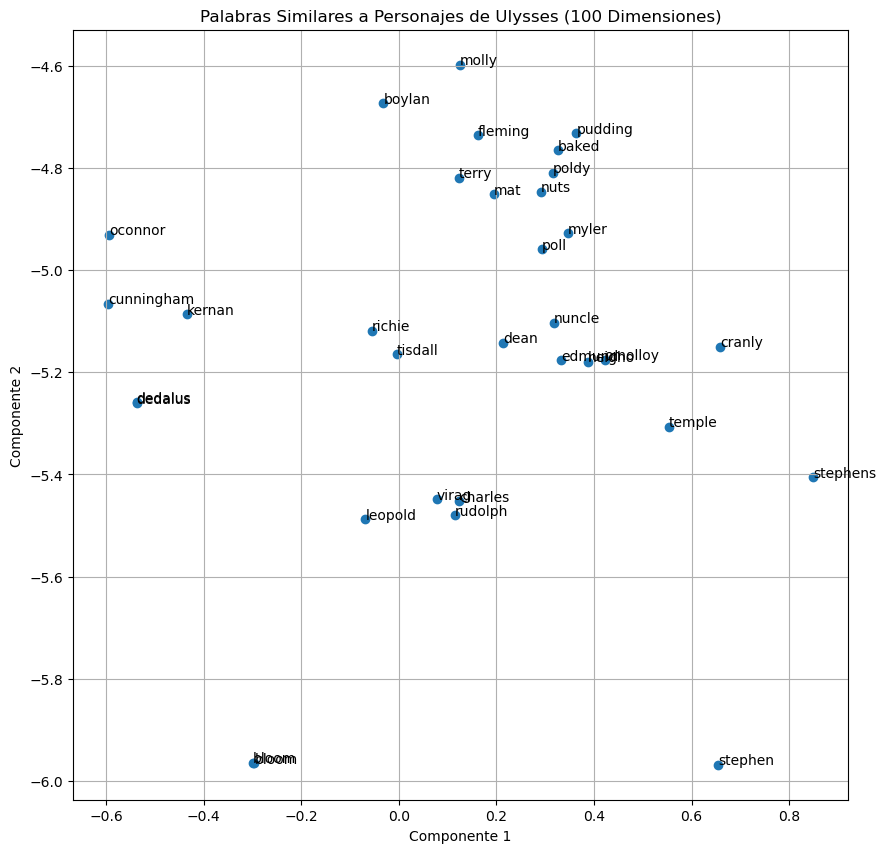

Buscando analogías temáticas para Ulysses de James Joyce...
Relación para love: [('loving', 0.5211244821548462), ('loved', 0.5049088597297668), ('lover', 0.5047010183334351), ('charm', 0.5036691427230835), ('jealous', 0.4984838366508484), ('affection', 0.4966733753681183), ('marrying', 0.4904365837574005), ('envy', 0.48566368222236633), ('sonetchka', 0.4819941818714142), ('lubov', 0.4811897277832031)]
Relación para war: [('intrigues', 0.528963029384613), ('duc', 0.5173958539962769), ('heroism', 0.5159695148468018), ('pauvre', 0.5134997367858887), ('oppress', 0.5094807147979736), ('motives', 0.5071894526481628), ('conclusion', 0.5059569478034973), ('wars', 0.5047104358673096), ('cleverly', 0.5009312033653259), ('mistakes', 0.5006991028785706)]
Relación para peace: [('happiness', 0.5302596092224121), ('imprudence', 0.5049219131469727), ('pray', 0.5018385052680969), ('folly', 0.4982888996601105), ('miserable', 0.4948056936264038), ('absolved', 0.4943636655807495), ('vouchsafed', 0.4916689

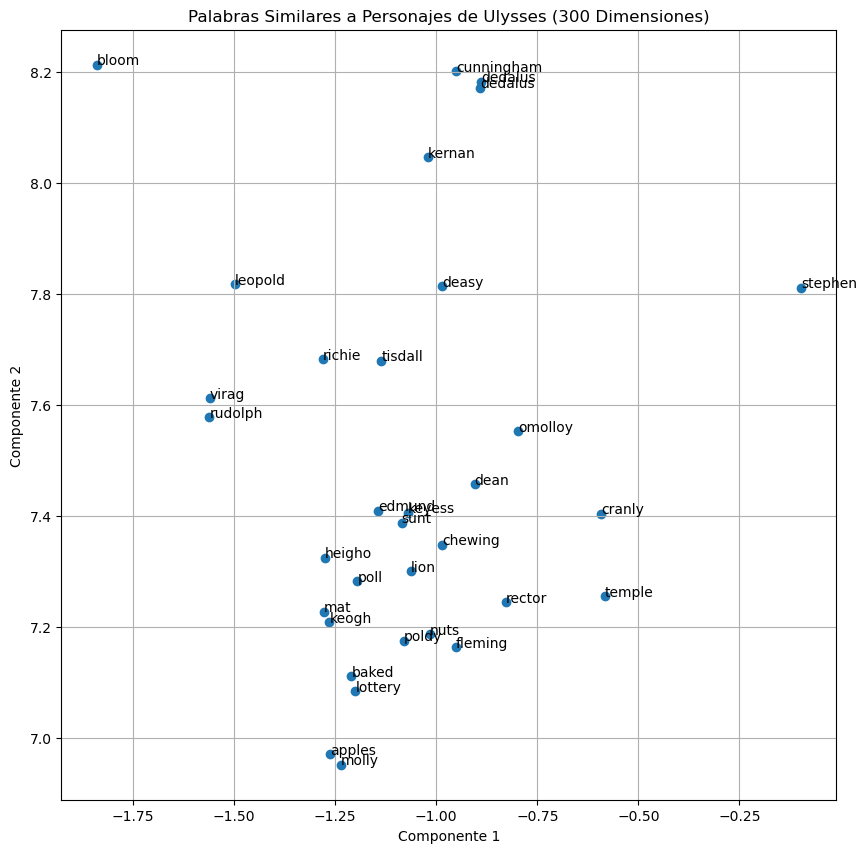

Buscando analogías temáticas para Ulysses de James Joyce...
Relación para love: [('jealous', 0.474642276763916), ('loved', 0.46974143385887146), ('charm', 0.4612244963645935), ('lover', 0.4412720501422882), ('sonetchka', 0.43954747915267944), ('affection', 0.4391343295574188), ('rosie', 0.4376932680606842), ('madly', 0.4374231696128845), ('shes', 0.4366903305053711), ('loves', 0.4364158511161804)]
Relación para war: [('intrigues', 0.5077990293502808), ('mistakes', 0.4798545241355896), ('cleverly', 0.47606784105300903), ('duc', 0.47411173582077026), ('magnanimity', 0.47325772047042847), ('wars', 0.472741037607193), ('loses', 0.47273632884025574), ('characteristics', 0.4714201092720032), ('economy', 0.4707048535346985), ('denghien', 0.4694519639015198)]
Relación para peace: [('beseech', 0.4957694709300995), ('miserable', 0.48886922001838684), ('consolations', 0.4876457750797272), ('goodness', 0.48693931102752686), ('vouchsafed', 0.4865373969078064), ('blessedness', 0.4846295714378357), (

In [3]:
# Ruta a los modelos Word2Vec combinados con diferentes tamaños de vectores
books_models = [
    'data/models/Books_50_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'data/models/Books_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'data/models/Books_300_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model'
]

# Nombres de los personajes principales de cada libro
books_main_characters = {
    'Sense and Sensibility de Jane Austen': ['elinor', 'marianne', 'edward', 'brandon', 'willoughby'],
    'Pride and Prejudice de Jane Austen': ['elizabeth', 'darcy', 'jane', 'bingley', 'lydia', 'wickham'],
    'Emma de Jane Austen': ['emma', 'knightley', 'harriet', 'churchill', 'jane'],
    'Youth de Leo Tolstoy': ['nicolas', 'dmitri', 'woloda', 'papa', 'katya', 'ivan', 'petrov'],
    'War and Peace de Leo Tolstoy': ['pierre', 'natasha', 'andrew', 'nicholas', 'helen', 'napoleon'],
    'Anna Karenina de Leo Tolstoy': ['anna', 'vronsky', 'levin', 'karenin', 'kitty'],
    'Dubliners de James Joyce': ['gabriel', 'eveline', 'farrington'],
    'A Portrait of the Artist as a Young Man de James Joyce': ['stephen', 'simon', 'mary', 'emma', 'cranly', 'dante'],
    'Ulysses de James Joyce': ['bloom', 'stephen', 'molly']
}

# Temáticas para explorar analogías
thematic_words = ['love', 'war', 'peace', 'death', 'honor']

# Número de palabras similares a visualizar para cada personaje
num_similar_words = 10

# Iterar sobre cada libro y visualizar los embeddings de las palabras más similares a los personajes principales
for book, main_characters in books_main_characters.items():
    print(f"Visualizando embeddings para {book}...")

    for model_path in books_models:
        
        # Cargar el modelo Word2Vec para el libro actual
        numero_dimensiones = re.findall(r'\d+', model_path)[0]
        model = load_word2vec_model(model_path)
        
        # Lista para almacenar las palabras más similares y sus vectores
        words = []
        word_vectors = []
    
        # Encontrar las palabras más similares a cada personaje principal
        for character in main_characters:
            if character in model.wv:
                similar_words = model.wv.most_similar(character, topn=num_similar_words)
                words.append(character)  # Incluir el personaje en sí
                word_vectors.append(model.wv[character])
    
                for word, _ in similar_words:
                    words.append(word)
                    word_vectors.append(model.wv[word])
            else:
                print(f"{character} no está en el vocabulario del modelo con {numero_dimensiones} dimensiones.")
        
        if words:
            # Convertir la lista de vectores de palabras a un array de NumPy
            word_vectors_array = np.array(word_vectors)
        
            # Reducir la dimensionalidad de los vectores a 2D usando t-SNE
            reduced_vectors = reduce_dimensions(word_vectors_array, method='tsne')
            
            # Visualizar los embeddings
            book_title = book.split(' de ')[0]
            plot_embeddings(reduced_vectors, words, title=f'Palabras Similares a Personajes de {book_title} ({numero_dimensiones} Dimensiones)')
        else:
            print(f"No se encontraron vectores de palabras para {book} con {numero_dimensiones} dimensiones.")
        
        # Explorar analogías
        print(f"Buscando analogías temáticas para {book}...")
        for theme in thematic_words:
            analogy = find_analogies(model, positive_words=[theme, 'woman'], negative_words=['man'])
            if analogy:
                print(f"Relación para {theme}: {analogy}")
            else:
                print(f"No se encontraron relaciones para el tema '{theme}' con {numero_dimensiones} dimensiones.")